<a href="https://colab.research.google.com/github/rejina0914/Worksheet/blob/main/Worksheet2(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.


In [39]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Worksheet-2(AI)/bank.csv")
print(df)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

2.Check info of the DataFrame and identify following: (a) columns with dtypes=object (b) unique values of those columns. (c) check for the total number of null values in each column.

In [3]:
import pandas as pd

#(a)Columns with dtype = object
object_cols = df.select_dtypes(include='object').columns
print("\nColumns with dtype = object:")
print(object_cols)

# (b) Unique values of each object column
print("\nUnique values of object columns:")
for col in object_cols:
    print(f"Column: {col}")
    print(df[col].unique())



Columns with dtype = object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values of object columns:
Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital
['married' 'single' 'divorced']
Column: education
['tertiary' 'secondary' 'unknown' 'primary']
Column: default
['no' 'yes']
Column: housing
['yes' 'no']
Column: loan
['no' 'yes']
Column: contact
['unknown' 'cellular' 'telephone']
Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column: poutcome
['unknown' 'failure' 'other' 'success']
Column: y
['no' 'yes']


In [2]:
# (c) Total number of null values in each column
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [5]:
import pandas as pd

numeric_df = df.select_dtypes(exclude='object')
print(numeric_df.head())
numeric_df.to_csv("/content/drive/MyDrive/Worksheet-2(AI)/banknumericdata.csv", index=False)
print("Numeric DataFrame saved as 'banknumericdata.csv'")

   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0
Numeric DataFrame saved as 'banknumericdata.csv'


4. Read ”banknumericdata.csv” and Find the summary statistics

In [6]:
import pandas as pd

numeric_df = pd.read_csv('/content/drive/MyDrive/Worksheet-2(AI)/banknumericdata.csv')
summary = numeric_df.describe()
print(summary)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}


In [9]:
import pandas as pd
df_medical = pd.read_csv("/content/drive/MyDrive/Worksheet-2(AI)/medical_students_dataset.csv")

In [13]:
print ( df_medical . info () )

null_val = df.isnull().sum()
missing_col = null_val[null_val>0]
print("Columns with missing values:\n", missing_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Columns with missing values:
 Series([], dtype: int64)


In [16]:
df_fill_zero = df_medical.fillna(0)
print(df_fill_zero.isnull().sum())

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


I used filling with 0 because no mean or median is required

In [17]:
df_remove_duplicate = df_medical.drop_duplicates()
print(df_remove_duplicate)

        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   NaN    Male  152.069157  47.630941          B        NaN   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female         NaN  46.234173          O        NaN   
...            ...   ...     ...         ...        ...        ...        ...   
199995         NaN  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194        NaN  16.831734   
199997     99998.0  34.0  Female         NaN  99.648914        NaN  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.175189   

        Temperature  Heart 

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”: Dataset Used: "titanic.csv" Problem - 1: Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?

In [30]:
import pandas as pd
df_titanic = pd.read_csv("/content/drive/MyDrive/Worksheet-2(AI)/Titanic-Dataset.csv")
df_new_col = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
df_new = pd.DataFrame(df_titanic, columns=df_new_col)
selected_col = df_new[df_new["Pclass"] == 1]
fare_mean = selected_col['Fare'].mean()
fare_median = selected_col['Fare'].median()
fare_max = selected_col['Fare'].max()
fare_min = selected_col['Fare'].min()


print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")



Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [31]:
age_null = selected_col['Age'].isnull().sum()
print(f"Number of null values in 'Age': {age_null}")
age_without_null = selected_col.dropna(subset=['Age'])
print(age_without_null['Age'].isnull().sum())

Number of null values in 'Age': 30
0


Problem-3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.


In [33]:
import pandas as pd

one_hot_encoding = pd.get_dummies(df_titanic['Embarked'], prefix='Embarked', dtype=int)

df_encoded = pd.concat([df_titanic, one_hot_encoding], axis=1)

print(df_encoded[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

df_titanic = pd.concat([df_titanic, one_hot_encoding], axis=1)
print(df_titanic.head(4))

df_titanic_new = df_titanic.drop("Embarked", axis=1 )
print(df_titanic_new.head(4))

print(df_titanic_new.head(4))

  Embarked  Embarked_C  Embarked_Q  Embarked_S
0        S           0           0           1
1        C           1           0           0
2        S           0           0           1
3        S           0           0           1
4        S           0           0           1
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  Embarked_C  Embarked_Q  \
0      0         A/5 21171   7.2500   NaN        S           0           

Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.

Mean survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


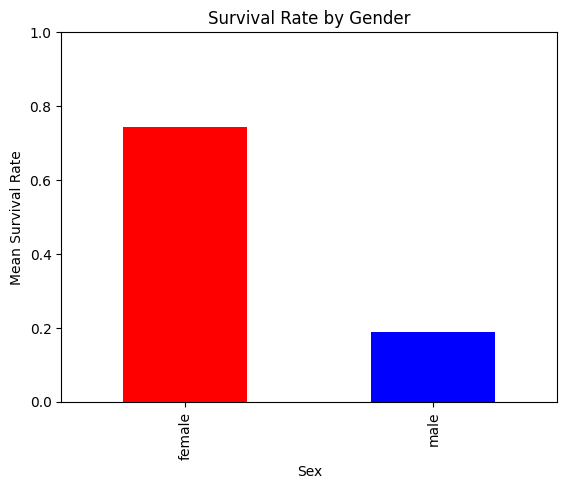

In [37]:
import pandas as pd

import matplotlib.pyplot as plt

survival_by_sex = df_titanic.groupby('Sex')['Survived'].mean()
print("Mean survival rate by Sex:")
print(survival_by_sex)

survival_by_sex.plot(kind='bar', color=['red', 'blue'])
plt.title('Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.ylim(0, 1)
plt.show()

Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603


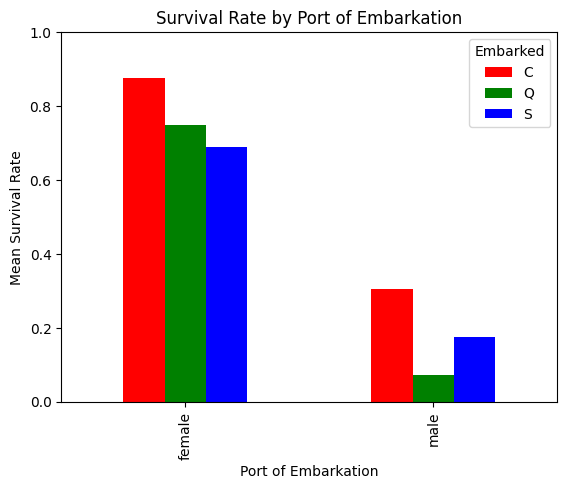

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Worksheet-2(AI)/Titanic-Dataset.csv')
port_survival = df_titanic.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()

print(port_survival)

port_survival.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.ylim(0,1)
plt.xlabel('Port of Embarkation')
plt.show()